<a href="https://colab.research.google.com/github/gurudattamanpreet/Banking-Marketing-Potential-Customers/blob/main/Banking_Marketing_Potential_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 2

**CONTEXT:**  A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee  majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the  borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an  average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing  department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit  with same budget as per last campaign.

**DATA DICTIONARY:**

1. ID: Customer ID
2. Age: Customer’s approximate age.
3. CustomerSince: Customer of the bank since. [unit is masked]
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode: Customer’s zip code.
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. [unit is masked]
10. Security: Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking: if the customer uses internet banking.
13. CreditCard: if the customer uses bank’s credit card.
14. LoanOnCard: if the customer has a loan on credit card.


**PROJECT OBJECTIVE:** Build a Machine Learning model to perform focused marketing by predicting the potential customers who will convert using the historical dataset.


**STEPS AND TASK [30 Marks]:**

1. **Data Understanding and Preparation: [5 Marks]**
    * Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables. [1 Marks]
    * Print shape and Column Names and DataTypes of both the Dataframe. [1 Marks]
    * Merge both the Dataframe on ‘ID’ feature to form a single DataFrame [2 Marks]
    * Change Datatype of below features to ‘Object’ [1 Marks]
 	    * *[‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’]*
		* *[Reason behind performing this operation:- Values in these features are binary i.e. 1/0. But DataType is ‘int’/’float’ which is not expected.]*
2. **Data Exploration and Analysis: [5 Marks]**
    * Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights. [2 Marks]
    * Check the percentage of missing values and impute if required. [1 Marks]
    * Check for unexpected values in each categorical variable and impute with best suitable value. [2 Marks]
		* *[Unexpected values means if all values in a feature are 0/1 then ‘?’, ‘a’, 1.5 are unexpected values which needs treatment]*
3. **Data Preparation and model building: [10 Marks]**
    * Split data into X and Y. [1 Marks]
        * *[Recommended to drop ID & ZipCode. LoanOnCard is target Variable]*
    * Split data into train and test. Keep 25% data reserved for testing. [1 Marks]
    * Train a Supervised Learning Classification base model - Logistic Regression. [2 Marks]
    * Print evaluation metrics for the model and clearly share insights. [1 Marks]
    * Balance the data using the right balancing technique. [2 Marks]
        * Check distribution of the target variable
        * Say output is class A : 20% and class B : 80%
        * Here you need to balance the target variable as 50:50.
        * Try appropriate method to achieve the same.
    * Again train the same previous model on balanced data. [1 Marks]
    * Print evaluation metrics and clearly share differences observed. [2 Marks]
4. **Performance Improvement: [10 Marks]**
    * Train a base model each for SVM, KNN. [4 Marks]
    * Tune parameters for each of the models wherever required and finalize a model. [3 Marks]
        * *(Optional: Experiment with various Hyperparameters - Research required)*
    * Print evaluation metrics for final model. [1 Marks]
    * Share improvement achieved from base model to final model. [2 Marks]

# Q1 Data Understanding and Preparation

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier

In [4]:
# A

In [5]:
url1='https://raw.githubusercontent.com/gurudattamanpreet/Banking-Marketing-Potential-Customers/refs/heads/main/Data1.csv'
url2='https://raw.githubusercontent.com/gurudattamanpreet/Banking-Marketing-Potential-Customers/refs/heads/main/Data2.csv'
df1 = pd.read_csv(url1)
df2 = pd.read_csv(url2)

In [6]:
# B

In [7]:
print(df1.info())
print('-'*30)
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB
None
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null   int64  


In [8]:
# C

In [9]:
df = pd.merge(df1, df2,on='ID')

In [10]:
# D

In [11]:
# lst_key = ['LoanOnCard','CreditCard','InternetBanking','FixedDepositAccount','Security','Level','HiddenScore']
lst_key = ['CreditCard','InternetBanking','FixedDepositAccount','Security','Level','HiddenScore']
lst_val = ['object']*len(lst_key)

In [12]:
data_dict = {lst_key[i]: lst_val[i] for i in range(len(lst_key))}

In [13]:
data_dict

{'CreditCard': 'object',
 'InternetBanking': 'object',
 'FixedDepositAccount': 'object',
 'Security': 'object',
 'Level': 'object',
 'HiddenScore': 'object'}

In [14]:
df = df.astype(data_dict)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 547.0+ KB


# Q2 Data Exploration and Analysis

In [16]:
# A

<Axes: xlabel='LoanOnCard'>

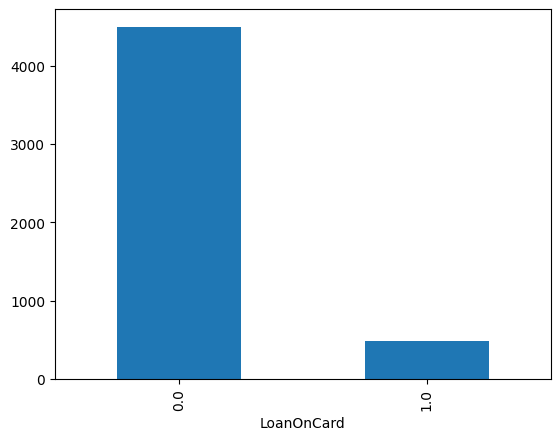

In [17]:
df['LoanOnCard'].value_counts().plot(kind='bar')

 Data is highly imbalanced towards 'No'

In [18]:
# B

In [19]:
df.isna().sum()/len(df)*100

,0
ID,0.0
Age,0.0
CustomerSince,0.0
HighestSpend,0.0
ZipCode,0.0
HiddenScore,0.0
MonthlyAverageSpend,0.0
Level,0.0
Mortgage,0.0
Security,0.0


0.4% Null values in LoanOnCard

In [20]:
df.dropna(inplace=True)

In [21]:
df.isna().sum()/len(df)*100

,0
ID,0.0
Age,0.0
CustomerSince,0.0
HighestSpend,0.0
ZipCode,0.0
HiddenScore,0.0
MonthlyAverageSpend,0.0
Level,0.0
Mortgage,0.0
Security,0.0


In [22]:
# C

In [23]:
col_list = df.select_dtypes(include='object').columns

In [24]:
for i in col_list:
    print('Unique values in {} are \n'.format(i),df[i].value_counts())
    print(i)
    print('*'*20)

Unique values in HiddenScore are 
 HiddenScore
1    1466
2    1293
4    1215
3    1006
Name: count, dtype: int64
HiddenScore
********************
Unique values in Level are 
 Level
1    2089
3    1496
2    1395
Name: count, dtype: int64
Level
********************
Unique values in Security are 
 Security
0    4460
1     520
Name: count, dtype: int64
Security
********************
Unique values in FixedDepositAccount are 
 FixedDepositAccount
0    4678
1     302
Name: count, dtype: int64
FixedDepositAccount
********************
Unique values in InternetBanking are 
 InternetBanking
1    2974
0    2006
Name: count, dtype: int64
InternetBanking
********************
Unique values in CreditCard are 
 CreditCard
0    3514
1    1466
Name: count, dtype: int64
CreditCard
********************


No unknown values observed

# Q3 Data Preparation and model building

In [25]:
# A

In [26]:
X = df.drop(['LoanOnCard','ID','ZipCode'],axis=1)
y = df['LoanOnCard']

In [27]:
# B

In [28]:
x_train, x_test, y_train, y_test = train_test_split(X,y,random_state = 90,test_size=0.25)

In [29]:
# C

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
x_train.head()

,Age,CustomerSince,HighestSpend,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard
3981,64,39,22,3,0.50,1,0,1,1,1,1
1270,43,18,60,2,2.20,3,0,0,0,0,1
1336,36,12,42,1,1.33,1,0,0,0,1,0
2123,28,2,9,1,0.10,2,0,0,0,1,0
1808,55,31,50,4,1.50,1,0,0,0,1,0


In [32]:
lr = LogisticRegression(solver='lbfgs',max_iter=2000)
# lr.fit(x_train,y_train.astype('int'))
lr.fit(x_train,y_train)


LogisticRegression(max_iter=2000)

In [33]:
train_pred = lr.predict(x_train)
test_pred = lr.predict(x_test)

In [34]:
test_pred.shape

(1245,)

In [35]:
y_test.shape

(1245,)

In [36]:
# D

In [37]:
accuracy_score(y_train, train_pred)

0.9504685408299867

In [38]:
accuracy_score(y_test, test_pred)

0.9582329317269076

In [39]:
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      3375
         1.0       0.83      0.62      0.71       360

    accuracy                           0.95      3735
   macro avg       0.89      0.80      0.84      3735
weighted avg       0.95      0.95      0.95      3735



In [40]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1125
         1.0       0.90      0.63      0.75       120

    accuracy                           0.96      1245
   macro avg       0.93      0.81      0.86      1245
weighted avg       0.96      0.96      0.95      1245



It is observed that accuracy is more but precision and recall values are on lower side for event 1.

In [41]:
# E
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [42]:
undersample = RandomUnderSampler(sampling_strategy=0.5)
oversample = RandomOverSampler(sampling_strategy='minority')

In [43]:
X_under, y_under = undersample.fit_resample(X, y)

In [44]:
X_under.shape

(1440, 11)

In [45]:
y_under.shape

(1440,)

In [46]:
y_under.value_counts()

,count
LoanOnCard,
0.0,960
1.0,480


In [47]:
X_new,y_new = oversample.fit_resample(X_under, y_under)

In [48]:
y_new.value_counts()

,count
LoanOnCard,
0.0,960
1.0,960


In [49]:
#F
x_train,x_test,y_train,y_test = train_test_split(X_new,y_new,test_size=0.25,random_state=87)

In [50]:
lr.fit(x_train,y_train)
train_pred = lr.predict(x_train)
test_pred = lr.predict(x_test)

In [51]:
# G
print(classification_report(y_train,train_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.89      0.90       725
         1.0       0.89      0.90      0.90       715

    accuracy                           0.90      1440
   macro avg       0.90      0.90      0.90      1440
weighted avg       0.90      0.90      0.90      1440



In [52]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90       235
         1.0       0.91      0.89      0.90       245

    accuracy                           0.90       480
   macro avg       0.90      0.90      0.90       480
weighted avg       0.90      0.90      0.90       480



Accuracy, precision and recall are improved and close to each other after balancing the data

# Q4 Performance Improvement

In [53]:
# A
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [54]:
def classify(classifier):
    classifier.fit(x_train,y_train)
    pred_train = classifier.predict(x_train)
    pred_test = classifier.predict(x_test)
    print('Training Performace')
    print(classification_report(y_train,pred_train))
    print('*'*50)
    print('Testing Performace')
    print(classification_report(y_test,pred_test))


In [55]:
svm = SVC()
classify(svm)

Training Performace
              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86       725
         1.0       0.83      0.93      0.88       715

    accuracy                           0.87      1440
   macro avg       0.88      0.87      0.87      1440
weighted avg       0.88      0.87      0.87      1440

**************************************************
Testing Performace
              precision    recall  f1-score   support

         0.0       0.92      0.82      0.86       235
         1.0       0.84      0.93      0.88       245

    accuracy                           0.88       480
   macro avg       0.88      0.87      0.87       480
weighted avg       0.88      0.88      0.87       480



In [56]:
nb = GaussianNB()
classify(nb)

Training Performace
              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       725
         1.0       0.87      0.77      0.82       715

    accuracy                           0.83      1440
   macro avg       0.83      0.83      0.83      1440
weighted avg       0.83      0.83      0.83      1440

**************************************************
Testing Performace
              precision    recall  f1-score   support

         0.0       0.77      0.90      0.83       235
         1.0       0.89      0.75      0.81       245

    accuracy                           0.82       480
   macro avg       0.83      0.82      0.82       480
weighted avg       0.83      0.82      0.82       480



In [57]:
# B & C

In [58]:
# SVM

In [59]:
svm = SVC(C=5,kernel='rbf',gamma='auto')
classify(svm)

Training Performace
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       725
         1.0       1.00      1.00      1.00       715

    accuracy                           1.00      1440
   macro avg       1.00      1.00      1.00      1440
weighted avg       1.00      1.00      1.00      1440

**************************************************
Testing Performace
              precision    recall  f1-score   support

         0.0       0.80      0.96      0.87       235
         1.0       0.95      0.76      0.85       245

    accuracy                           0.86       480
   macro avg       0.87      0.86      0.86       480
weighted avg       0.87      0.86      0.86       480



In [60]:
# D

Improvement Achieved:
+6-7% in both train and test data for accuracy, precision, recall.